In [18]:
from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
import pandas as pd
df=pd.read_csv('car.csv')

In [20]:
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [21]:
df.isna().sum()

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64

In [22]:
X = df.drop(columns=['Car_Acceptability'])
Y = df[['Car_Acceptability']]

In [23]:
Y

,Car_Acceptability
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y['Car_Acceptability'] = le.fit_transform(Y['Car_Acceptability'])

In [28]:
Y

,Car_Acceptability
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


In [29]:
Y.value_counts()

Car_Acceptability
2                    1210
0                     384
1                      69
3                      65
Name: count, dtype: int64

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Fill the Missing Value
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder 
# Scalar == Scaling Two Type 1) Standard -- X - Xm / SD  --- Range -3 tp 3   2) Normalition -- X - Xmin / Xmax - Xmin  Range - -1 to 1
# OneHot Encoder = Convert Categorical Features into Continous --- Create Multiple Columns -- Each Wrod One Columns e.g Apple --- 
# new columns will get created for Apple ---- where ever there is apple entry it will show 1 otherwise 0 
# Ordinal Encoder - used for Ordinal data like S M L XL , Only One Columns will be get created it will have value like S-1, M-2, L-3, XL-4
from sklearn.compose import ColumnTransformer # Joining the Cat and Con Columns 

In [31]:

cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [35]:
df.dtypes

Buying_Price         object
Maintenance_Price    object
No_of_Doors          object
Person_Capacity      object
Size_of_Luggage      object
Safety               object
Car_Acceptability    object
dtype: object

In [36]:
num_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical pipeline (Constant strategy as Not Available)
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvl')),
                            ('Ohe', OneHotEncoder())])

# Combine both cat an con pipelines
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)])

In [38]:
X_pre = pre1.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [39]:
cols = pre1.get_feature_names_out()
cols

array(['cat__Buying_Price_high', 'cat__Buying_Price_low',
       'cat__Buying_Price_med', 'cat__Buying_Price_vhigh',
       'cat__Maintenance_Price_high', 'cat__Maintenance_Price_low',
       'cat__Maintenance_Price_med', 'cat__Maintenance_Price_vhigh',
       'cat__No_of_Doors_2', 'cat__No_of_Doors_3', 'cat__No_of_Doors_4',
       'cat__No_of_Doors_5more', 'cat__Person_Capacity_2',
       'cat__Person_Capacity_4', 'cat__Person_Capacity_more',
       'cat__Size_of_Luggage_big', 'cat__Size_of_Luggage_med',
       'cat__Size_of_Luggage_small', 'cat__Safety_high',
       'cat__Safety_low', 'cat__Safety_med'], dtype=object)

In [40]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,cat__Buying_Price_high,cat__Buying_Price_low,cat__Buying_Price_med,cat__Buying_Price_vhigh,cat__Maintenance_Price_high,cat__Maintenance_Price_low,cat__Maintenance_Price_med,cat__Maintenance_Price_vhigh,cat__No_of_Doors_2,cat__No_of_Doors_3,...,cat__No_of_Doors_5more,cat__Person_Capacity_2,cat__Person_Capacity_4,cat__Person_Capacity_more,cat__Size_of_Luggage_big,cat__Size_of_Luggage_med,cat__Size_of_Luggage_small,cat__Safety_high,cat__Safety_low,cat__Safety_med
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [41]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [43]:
model.score(xtrain, ytrain)

0.9204840103716508

In [44]:
model.score(xtest, ytest)

0.9176882661996497

In [45]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

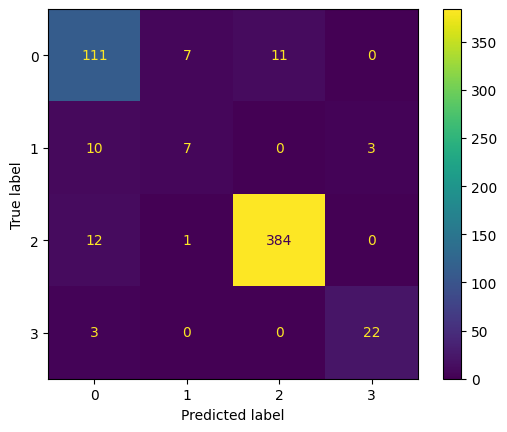

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd=ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       129
           1       0.47      0.35      0.40        20
           2       0.97      0.97      0.97       397
           3       0.88      0.88      0.88        25

    accuracy                           0.92       571
   macro avg       0.78      0.76      0.77       571
weighted avg       0.92      0.92      0.92       571



In [49]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_tr_lb

array([2, 2, 2, ..., 0, 2, 0])